In [448]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [510]:
df = pd.read_csv("data.csv")
df.info()

df['TEXT_BANK'] = df['TEXT_BANK'].fillna('Anonymous Bank')

mode = df['NUM_AGE'].mode()
print(mode)

max_age = df['NUM_AGE'].max()
min_age = df['NUM_AGE'].min()

print(max)

mean = df['NUM_AGE'].mean()
print(mean)

unique_ages = range(min_age, max_age+1)
unique_banks = df['TEXT_BANK'].unique()
unique_targets = df['TARGET'].unique()

print(unique_banks)


full_age_range = set(range(18, 85))

present_ages = set(df['NUM_AGE'])

missing_ages = full_age_range - present_ages

print(missing_ages)
# summary of the dataset - data types, ranges of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODE_ZIP                 5000 non-null   int64  
 1   AMT_NET_INCOME           5000 non-null   int64  
 2   AMT_REQUESTED_TICKET     5000 non-null   float64
 3   TEXT_BANK                4969 non-null   object 
 4   NUM_AGE                  5000 non-null   int64  
 5   TEXT_GENDER              5000 non-null   object 
 6   NFLAG_MOBILEDEVICE       5000 non-null   int64  
 7   CODE_IP_1                5000 non-null   int64  
 8   NUM_LEVEN_EMAIL          5000 non-null   int64  
 9   NFLAG_EMAIL_NUMERAL      5000 non-null   int64  
 10  CNT_REJECTED             5000 non-null   int64  
 11  NUM_DAYS_CREDIT_HISTORY  5000 non-null   int64  
 12  TARGET                   5000 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 507.9+ KB
0    20
Name: NUM_

In [450]:
mean_in_cz = 42.7 #https://scitani.gov.cz/vysledky#:~:text=Podle%20v%C3%BDsledk%C5%AF%20S%C4%8D%C3%ADt%C3%A1n%C3%AD%202021%20%C5%BEilo,a%2049%2C3%20%25%20mu%C5%BE%C5%AF.

In [451]:
age_bins = [18, 28, 38, 48, 58, 68, 78, 88]
age_labels = ['18-28', '29-38', '39-48', '49-58', '59-68', '69-78', '79-88']

df['age_range'] = pd.cut(df["NUM_AGE"], bins=age_bins, labels=age_labels, right=False)

age_gender_pivot = df.pivot_table(index='age_range', columns=['TEXT_GENDER'], aggfunc='size', fill_value=0)

# Display the result - show highlighted rows in pink / blue
print(age_gender_pivot)


TEXT_GENDER   Muž  Žena
age_range              
18-28        1529  1014
29-38         847   523
39-48         340   332
49-58         125   135
59-68          44    61
69-78          12    35
79-88           0     3


/tmp/ipykernel_76665/1915512564.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_gender_pivot = df.pivot_table(index='age_range', columns=['TEXT_GENDER'], aggfunc='size', fill_value=0)


In [452]:
bank_pivot = df.pivot_table(index='TEXT_BANK', columns='TARGET', aggfunc='size', fill_value=0)
bank_pivot['target_rate'] = bank_pivot[1]/(bank_pivot[0] + bank_pivot[1])*100
print(bank_pivot.sort_values(by='target_rate', ascending=False))

TARGET                                               0    1  target_rate
TEXT_BANK                                                               
Anonymous Bank                                      23    8    25.806452
BNP Paribas Personal Finance SA, odštěpný závod      7    2    22.222222
Raiffeisenbank a.s.                                238   44    15.602837
mBank S.A., organizační složka                     124   17    12.056738
Česká spořitelna, a.s.                            1112  142    11.323764
UniCredit Bank Czech Republic and Slovakia, a.s.   159   19    10.674157
Air Bank a.s.                                      606   71    10.487445
Fio banka, a.s.                                    217   22     9.205021
Komerční banka, a.s.                               457   42     8.416834
Equa bank a.s.                                     320   29     8.309456
MONETA Money Bank, a.s.                            655   57     8.005618
Československá obchodní banka, a.s.                

In [461]:
grouped_age_target_bank = df.groupby(['NUM_AGE', 'TEXT_BANK', 'TARGET']).size().reset_index(name='COUNT')

from itertools import product
all_combinations = pd.DataFrame(
    list(product(unique_ages, unique_banks, unique_targets)),
    columns=['NUM_AGE', 'TEXT_BANK', 'TARGET']
)

grouped_age_target_bank_output = all_combinations.merge(grouped_age_target_bank, on=['NUM_AGE', 'TEXT_BANK', 'TARGET'], how='left').fillna(0)

# Ensure COUNT is an integer
grouped_age_target_bank_output['COUNT'] = grouped_age_target_bank_output['COUNT'].astype(int)

print(grouped_age_target_bank_output)
grouped_age_target_bank_output.to_csv("final_output.csv")

      NUM_AGE                                        TEXT_BANK  TARGET  COUNT
0          18                           Česká spořitelna, a.s.       0     44
1          18                           Česká spořitelna, a.s.       1     16
2          18                             Komerční banka, a.s.       0     14
3          18                             Komerční banka, a.s.       1      2
4          18              Československá obchodní banka, a.s.       0     19
...       ...                                              ...     ...    ...
2005       84                   Waldviertler Sparkasse Bank AG       1      0
2006       84                              Banka CREDITAS a.s.       0      0
2007       84                              Banka CREDITAS a.s.       1      0
2008       84  BNP Paribas Personal Finance SA, odštěpný závod       0      0
2009       84  BNP Paribas Personal Finance SA, odštěpný závod       1      0

[2010 rows x 4 columns]


In [454]:
ages_that_exist = df.groupby(['NUM_AGE']).size().reset_index(name='COUNT')
ages_that_exist.to_csv("ages_that_exist.csv")

grouped_age_target = df.groupby(['NUM_AGE', 'TARGET']).size().reset_index(name='COUNT')

from itertools import product
all_combinations = pd.DataFrame(
    list(product(unique_ages, unique_targets)),
    columns=['NUM_AGE', 'TARGET']
)

final_output = all_combinations.merge(grouped_age_target, on=['NUM_AGE', 'TARGET'], how='left').fillna(0)

# Ensure COUNT is an integer
final_output['COUNT'] = final_output['COUNT'].astype(int)

print(final_output)
final_output.to_csv("final_age_output.csv")

     NUM_AGE  TARGET  COUNT
0         18       0    142
1         18       1     53
2         19       0    189
3         19       1     33
4         20       0    251
..       ...     ...    ...
129       82       1      0
130       83       0      1
131       83       1      0
132       84       0      1
133       84       1      0

[134 rows x 3 columns]


TARGET  NUM_AGE    0   1
0            18  142  53
1            19  189  33
2            20  251  34
3            21  232  24
4            22  235  22
..          ...  ...  ..
57           75    3   0
58           76    2   0
59           80    0   1
60           83    1   0
61           84    1   0

[62 rows x 3 columns]


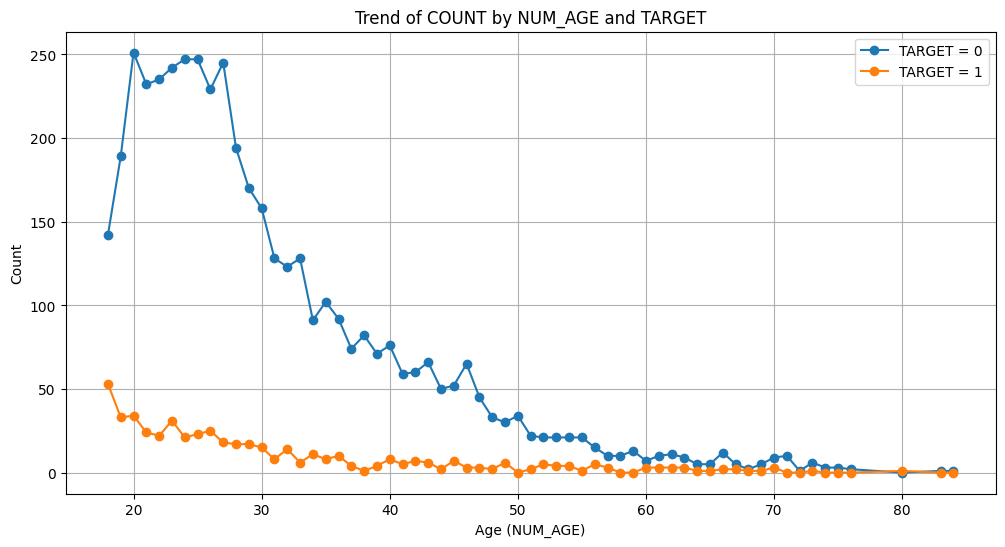

In [455]:
age_trends = grouped_age_target.groupby(['NUM_AGE', 'TARGET'])['COUNT'].sum().unstack(fill_value=0).reset_index()
# grouped_age_target_bank = df.groupby(['NUM_AGE', 'TEXT_BANK', 'TARGET']).size().reset_index(name='COUNT')
print(age_trends)

plt.figure(figsize=(12, 6))
plt.plot(age_trends['NUM_AGE'], age_trends[0], label='TARGET = 0', marker='o')
plt.plot(age_trends['NUM_AGE'], age_trends[1], label='TARGET = 1', marker='o')
plt.title('Trend of COUNT by NUM_AGE and TARGET')
plt.xlabel('Age (NUM_AGE)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

TARGET  NUM_AGE    0   1  TARGET_RATE
0            18  142  53     0.271795
1            19  189  33     0.148649
2            20  251  34     0.119298
3            21  232  24     0.093750
4            22  235  22     0.085603
..          ...  ...  ..          ...
57           75    3   0     0.000000
58           76    2   0     0.000000
59           80    0   1     1.000000
60           83    1   0     0.000000
61           84    1   0     0.000000

[62 rows x 4 columns]


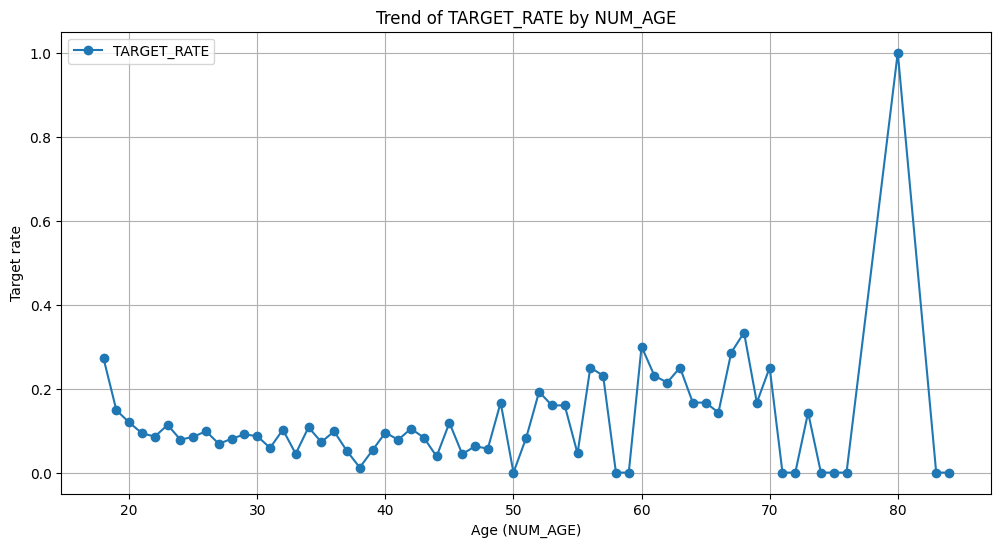

In [456]:
age_trends['TARGET_RATE'] = age_trends[1] / (age_trends[0] + age_trends[1])
print(age_trends)

plt.figure(figsize=(12, 6))
plt.plot(age_trends['NUM_AGE'], age_trends['TARGET_RATE'], label='TARGET_RATE', marker='o')
plt.title('Trend of TARGET_RATE by NUM_AGE')
plt.xlabel('Age (NUM_AGE)')
plt.ylabel('Target rate')
plt.legend()
plt.grid(True)
plt.show()

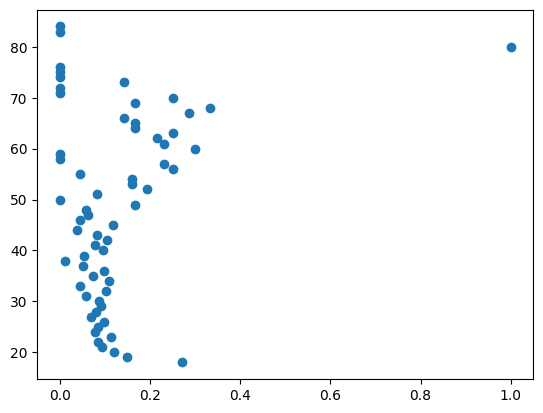

In [457]:
plt.scatter(age_trends['TARGET_RATE'], age_trends['NUM_AGE'])
plt.show()

In [458]:
def scatter_plot_by_age_group(age_trends):
    cluster_0 = age_trends[age_trends['Age_Group'] == 0]
    cluster_1 = age_trends[age_trends['Age_Group'] == 1]
    cluster_2 = age_trends[age_trends['Age_Group'] == 2]
    cluster_3 = age_trends[age_trends['Age_Group'] == 3]
    cluster_4 = age_trends[age_trends['Age_Group'] == 4]
    cluster_5 = age_trends[age_trends['Age_Group'] == 5]

    plt.scatter(cluster_0['TARGET_RATE'], cluster_0['NUM_AGE'], label='Cluster 0')
    plt.scatter(cluster_1['TARGET_RATE'], cluster_1['NUM_AGE'], label='Cluster 1')
    plt.scatter(cluster_2['TARGET_RATE'], cluster_2['NUM_AGE'], label='Cluster 2')
    plt.scatter(cluster_3['TARGET_RATE'], cluster_3['NUM_AGE'], label='Cluster 3')
    plt.scatter(cluster_4['TARGET_RATE'], cluster_4['NUM_AGE'], label='Cluster 4')
    plt.scatter(cluster_5['TARGET_RATE'], cluster_5['NUM_AGE'], label='Cluster 5')
    plt.show()

In [459]:
def age_clusters(age_stats):
    age_labels = []
    for i, bin in age_stats.iterrows():
        label = f'{bin['min']} - {bin['max']}'
        age_labels.append(label)

    age_bins = []
    age_bins.append(int(age_stats['min'][0]))
    age_bins.extend(age_stats['max'].to_list())
    return age_bins, age_labels

def target_rate_by_age_group(age_bins, age_labels):
    age_pivot = df
    age_pivot['age_range'] = pd.cut(age_pivot["NUM_AGE"], bins=age_bins, labels=age_labels, right=False)
    age_pivot = age_pivot.pivot_table(index='age_range', columns=['TARGET'], aggfunc='size', fill_value=0)
    age_pivot['TARGET_RATE'] = age_pivot[1] / (age_pivot[0] + age_pivot[1]) * 100
    return age_pivot

def target_rate_by_age_group_and_bank(age_bins, age_labels):
    # age_trends = age_trends[~age_trends['NUM_AGE'].isin(missing_ages)]

    grouped_age_target_bank_output = grouped_age_target_bank_output[grouped_age_target_bank_output['COUNT'] != 0]
    age_bank_pivot = df
    age_bank_pivot['age_range'] = pd.cut(age_bank_pivot["NUM_AGE"], bins=age_bins, labels=age_labels, right=False)
    age_pivot = age_pivot.pivot_table(index='age_range', columns=['TARGET'], aggfunc='size', fill_value=0)
    age_pivot['TARGET_RATE'] = age_pivot[1] / (age_pivot[0] + age_pivot[1]) * 100
    return age_pivot

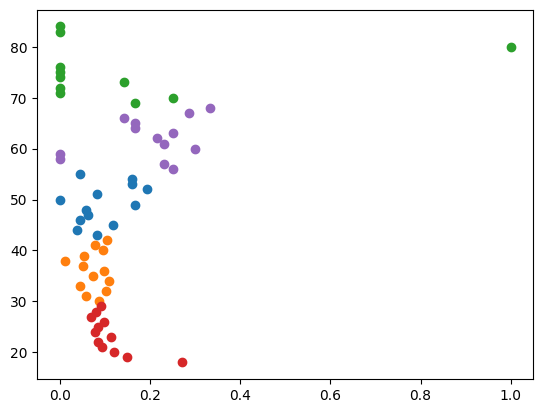

[18, 29, 42, 55, 68, 84]
['18 - 29', '30 - 42', '43 - 55', '56 - 68', '69 - 84']
TARGET        0    1  TARGET_RATE
age_range                        
18 - 29    2453  301    10.929557
30 - 42    1354  111     7.576792
43 - 55     520   51     8.931699
56 - 68     133   27    16.875000
69 - 84      42    7    14.285714


/tmp/ipykernel_76665/281383518.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_pivot = age_pivot.pivot_table(index='age_range', columns=['TARGET'], aggfunc='size', fill_value=0)


In [460]:
age_trends['Age_Group'] = KMeans(n_clusters=5, random_state=0).fit_predict(age_trends[['NUM_AGE']])
age_stats = age_trends.groupby('Age_Group')['NUM_AGE'].agg(['min', 'max']).reset_index()
age_stats = age_stats.sort_values('min').reset_index()

scatter_plot_by_age_group(age_trends=age_trends)
age_bins, age_labels = age_clusters(age_stats)

age_table = target_rate_by_age_group(age_bins, age_labels)

print(age_bins)
print(age_labels)
print(age_table)

In [475]:
non_zero_banks = grouped_age_target_bank_output.groupby(['NUM_AGE', 'TEXT_BANK'])['COUNT'].transform('sum') > 0
filtered_data = grouped_age_target_bank_output[non_zero_banks]

target_rate_data = filtered_data.pivot_table(
    index=['NUM_AGE', 'TEXT_BANK'],
    columns='TARGET',
    values='COUNT',
    aggfunc='sum',
    fill_value=0
).reset_index()

target_rate_data.columns.name = None  # Remove the multi-index for clarity
target_rate_data = target_rate_data.rename(columns={0: 'COUNT_0', 1: 'COUNT_1'})

# target_rate_data['TARGET_RATE'] = target_rate_data['COUNT_1'] / (target_rate_data['COUNT_0'] + target_rate_data['COUNT_1']) * 100
# target_rate_data = target_rate_data.drop(columns=['COUNT_0', 'COUNT_1'])
print(target_rate_data)
target_rate_data.to_csv("target_rate_data.csv")

# grouped_age_target_bank_output['age_range'] = pd.cut(target_rate_data["NUM_AGE"], bins=age_bins, labels=age_labels, right=False)
# print(grouped_age_target_bank_output)

# age_pivot = grouped_age_target_bank_output.pivot_table(index='age_range', columns=['TARGET'], aggfunc='size', fill_value=0)
# age_pivot['TARGET_RATE'] = age_pivot[1] / (age_pivot[0] + age_pivot[1]) * 100

target_rate_data['AGE_CATEGORY'] = pd.cut(target_rate_data['NUM_AGE'], bins=age_bins, labels=age_labels, right=False)

# Group by TEXT_BANK and AGE_CATEGORY to calculate totals
result = target_rate_data.groupby(['TEXT_BANK', 'AGE_CATEGORY']).agg(
    TOTAL_COUNT_0=('COUNT_0', 'sum'),
    TOTAL_COUNT_1=('COUNT_1', 'sum')
).reset_index()

result['TARGET_RATE'] = result['TOTAL_COUNT_1'] / ( result['TOTAL_COUNT_1'] +  result['TOTAL_COUNT_0']) * 100
result = result.drop(columns=['TOTAL_COUNT_1', 'TOTAL_COUNT_0'])

print(result)
result.to_csv("result.csv")

     NUM_AGE                            TEXT_BANK  COUNT_0  COUNT_1
0         18                        Air Bank a.s.       20       11
1         18                       Equa bank a.s.        8        1
2         18                      Fio banka, a.s.        2        3
3         18                 Komerční banka, a.s.       14        2
4         18              MONETA Money Bank, a.s.       14        3
..       ...                                  ...      ...      ...
503       75               Česká spořitelna, a.s.        2        0
504       76               Česká spořitelna, a.s.        2        0
505       80               Česká spořitelna, a.s.        0        1
506       83  Československá obchodní banka, a.s.        1        0
507       84               Česká spořitelna, a.s.        1        0

[508 rows x 4 columns]
                 TEXT_BANK AGE_CATEGORY  TARGET_RATE
0            Air Bank a.s.      18 - 29    12.871287
1            Air Bank a.s.      30 - 42     6.763285
2

/tmp/ipykernel_76665/2853268814.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = target_rate_data.groupby(['TEXT_BANK', 'AGE_CATEGORY']).agg(


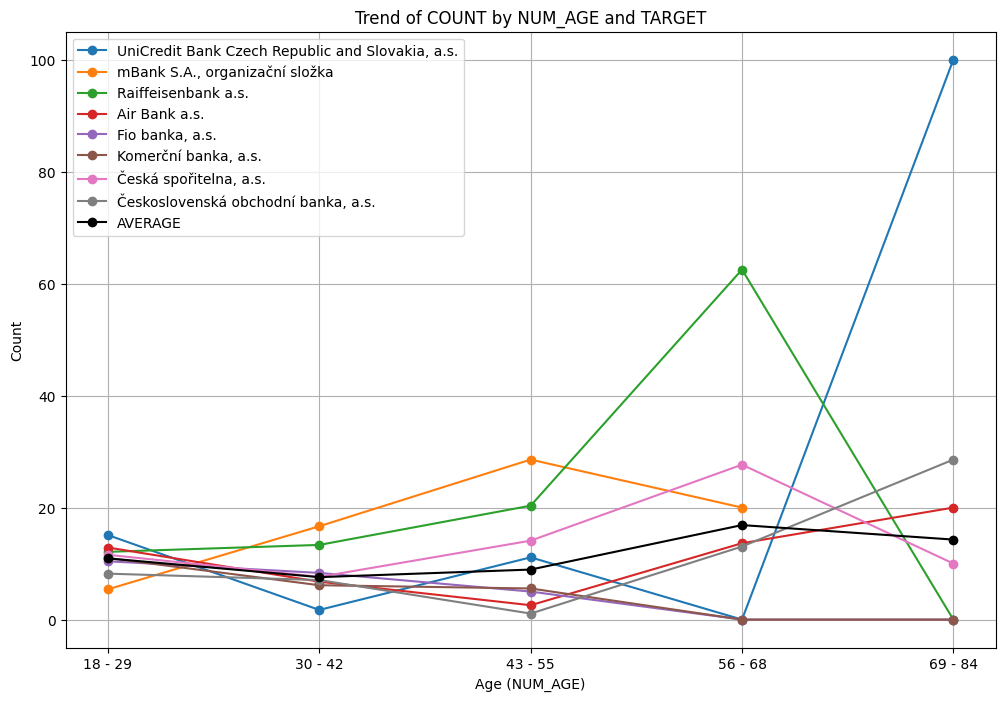

In [521]:
banks_of_interest = ["UniCredit Bank Czech Republic and Slovakia, a.s.",
                     "mBank S.A., organizační složka",
                     "Raiffeisenbank a.s.",
                     "Air Bank a.s.",
                     "Fio banka, a.s.",
                     "Komerční banka, a.s.",
                     "Česká spořitelna, a.s.",
                     "Československá obchodní banka, a.s."]

plt.figure(figsize=(12, 8))

for i in banks_of_interest:
    line_result = result[result['TEXT_BANK'] == i]
    plt.plot(line_result['AGE_CATEGORY'], line_result['TARGET_RATE'], label=str(i), marker='o')
plt.plot(line_result['AGE_CATEGORY'], age_table['TARGET_RATE'], label="AVERAGE", marker='o', color='black')
plt.title('Trend of COUNT by NUM_AGE and TARGET')
plt.xlabel('Age (NUM_AGE)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [522]:
# for a in age_labels:
#        fig, ax = plt.subplots()

#        y = []
#        for i in unique_banks:
#               line_result = result[result['AGE_CATEGORY'] == a]

#               line_result = line_result[line_result['TEXT_BANK'] == i]
#               y.append(float(line_result['TARGET_RATE']))

#        ax.bar(np.arange(len(unique_banks)), y, width=1, edgecolor="white", linewidth=0.7)

#        plt.show()

# for i, bank in enumerate(unique_banks):
#        print(f'{i}: {bank}')